In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
deptinfo = pd.read_csv("deptinfo.csv", header = None)
deptinfo = deptinfo[[0, 1]]
deptinfo = deptinfo.rename(columns = {0: "DEPT", 1: "DEPTDESC"})
deptinfo.head()

,DEPT,DEPTDESC
0,800,CLINIQUE
1,801,LESLIE
2,1100,GARY F
3,1107,JACQUES
4,1202,CABERN


In [4]:
skuinfo = pd.read_csv("skuinfo.csv", header = None, 
                      names = ["SKU", "DEPT", "CLASSID", "UPC", "STYLE", "COLOR", "SIZE", "PACKSIZE", "VENDOR", "BRAND", 1, 2, 3])
skuinfo.head()

/var/folders/s0/98nvy2x533n26bctzm80j1c00000gn/T/ipykernel_8638/824540460.py:1: DtypeWarning: Columns (7,8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  skuinfo = pd.read_csv("skuinfo.csv", header = None,


,SKU,DEPT,CLASSID,UPC,STYLE,COLOR,SIZE,PACKSIZE,VENDOR,BRAND,1,2,3
0,3,6505,113,400000003000,00 F55KT2,WHISPERWHITE,P8EA,1,5119207,TURNBURY,0,NaN,NaN
1,4,8101,002,400000004000,22 615CZ4,SPEARMI,S,1,3311144,C A SPOR,0,NaN,NaN
2,5,7307,003,400000005000,7LBS 245-01,34 SILVER,KING,1,5510554,BEAU IDE,0,NaN,NaN
3,8,3404,00B,400000008000,622 F05H84,MORNING MI,2T,1,2912827,HARTSTRI,0,NaN,NaN
4,15,2301,004,400000015000,126 MDU461,255CAMEL,12,1,23272,JONES/LA,0,NaN,NaN


In [5]:
df = pd.read_csv("skuinfo.csv", sep = "delimiter", header = None)
df 

/var/folders/s0/98nvy2x533n26bctzm80j1c00000gn/T/ipykernel_8638/1413031463.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("skuinfo.csv", sep = "delimiter", header = None)


,0
0,"3,6505,113,000400000003000,00 F55KT2,WHISPE..."
1,"4,8101,002,000400000004000,22 615CZ4,SPEARM..."
2,"5,7307,003,000400000005000,7LBS 245-01,34 SIL..."
3,"8,3404,00B,000400000008000,622 F05H84,MORNIN..."
4,"15,2301,004,000400000015000,126 MDU461,255CA..."
...,...
1564173,"9999973,3103,009,000400009973999,702 S3JAYV,..."
1564174,"9999974,9801,726,000400009974999, G50171,..."
1564175,"9999991,2301,004,000400009991999,026 MDU201,..."
1564176,"9999992,1202,402,000400009992999,14 F52UN1,..."


In [6]:
drops = []

for i, v in enumerate(df[0]):
    if df.iloc[i, 0].count(',') > 10:
        drops.append(i)
        
len(drops)

8148

Since the number of rows with extra column is relatively small compared with total number of rows, it is reasonable to drop these.

In [7]:
skuinfo = skuinfo.drop(drops)
columns_to_select = skuinfo.columns[:-3]
skuinfo = skuinfo[columns_to_select]
skuinfo

,SKU,DEPT,CLASSID,UPC,STYLE,COLOR,SIZE,PACKSIZE,VENDOR,BRAND
0,3,6505,113,400000003000,00 F55KT2,WHISPERWHITE,P8EA,1,5119207,TURNBURY
1,4,8101,002,400000004000,22 615CZ4,SPEARMI,S,1,3311144,C A SPOR
2,5,7307,003,400000005000,7LBS 245-01,34 SILVER,KING,1,5510554,BEAU IDE
3,8,3404,00B,400000008000,622 F05H84,MORNING MI,2T,1,2912827,HARTSTRI
4,15,2301,004,400000015000,126 MDU461,255CAMEL,12,1,23272,JONES/LA
...,...,...,...,...,...,...,...,...,...,...
1564173,9999973,3103,009,400009973999,702 S3JAYV,STONE,4,1,6813115,POLO JEA
1564174,9999974,9801,726,400009974999,G50171,NAVY MULTI,10,1,9212766,GABAR IN
1564175,9999991,2301,004,400009991999,026 MDU201,618RED ROSE,8,1,0023272,JONES/LA
1564176,9999992,1202,402,400009992999,14 F52UN1,PALE JADE,L,1,1446212,CABERNET


In [8]:
dept_sku = skuinfo.merge(deptinfo, on = "DEPT")
dept_sku

,SKU,DEPT,CLASSID,UPC,STYLE,COLOR,SIZE,PACKSIZE,VENDOR,BRAND,DEPTDESC
0,3,6505,113,400000003000,00 F55KT2,WHISPERWHITE,P8EA,1,5119207,TURNBURY,ST JOHN
1,466,6505,511,400000466000,10 F55KR5,TRUEBURGUNDY,XL,1,4259203,ROUNDTRE,ST JOHN
2,1211,6505,113,400001211000,92 F55KR9,OATMEALHTHER,XL,1,4259203,ROUNDTRE,ST JOHN
3,1302,6505,203,400001302000,6 115K83,STRETCH LIMO,S,1,5119207,ROUNDTRE,ST JOHN
4,1568,6505,127,400001568000,00 S65KR4,COPPER TAN,XL,1,7679205,ROUNDTRE,ST JOHN
...,...,...,...,...,...,...,...,...,...,...,...
1556025,9637469,4400,007,400007469963,40 BA3003,HOLIDAY SE,U,3,6011254,LIZ CLAI,BORA
1556026,9723206,4400,006,400003206972,791868,JAN S04GWP,S04 GWP,6,6011254,LIZ CLAI,BORA
1556027,9843436,4400,007,400003436984,520184,SUMMER SET,CURVE,1,6011254,LIZ CLAI,BORA
1556028,9857469,4400,007,400007469985,844232,HOLIDAY SE,U,3,6011254,LIZ CLAI,BORA


In [9]:
dept_sku.shape

(1556030, 11)

In [10]:
dept_sku.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556030 entries, 0 to 1556029
Data columns (total 11 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   SKU       1556030 non-null  int64 
 1   DEPT      1556030 non-null  int64 
 2   CLASSID   1556030 non-null  object
 3   UPC       1556030 non-null  int64 
 4   STYLE     1556030 non-null  object
 5   COLOR     1556030 non-null  object
 6   SIZE      1556030 non-null  object
 7   PACKSIZE  1556030 non-null  object
 8   VENDOR    1556030 non-null  object
 9   BRAND     1556030 non-null  object
 10  DEPTDESC  1556030 non-null  object
dtypes: int64(3), object(8)
memory usage: 142.5+ MB


In [11]:
skuinfo.isnull().sum()

SKU         0
DEPT        0
CLASSID     0
UPC         0
STYLE       0
COLOR       0
SIZE        0
PACKSIZE    0
VENDOR      0
BRAND       0
dtype: int64

### SKU

In [13]:
dept_sku["SKU"].nunique()

1556030

### DEPT

In [14]:
dept_sku["DEPT"].nunique()

60

In [41]:
dept_sku["DEPT"].value_counts()

6006    150796
4505    142108
7106    131106
8101     55957
4303     53991
3103     53094
6404     52717
4402     47222
2301     47215
7101     46578
8305     39931
9105     39479
1301     38246
5203     37678
5301     35158
4407     33985
3105     32417
2503     31262
9801     29587
3102     29004
5404     28729
3404     27608
8306     26771
6601     26526
3701     24280
7205     24188
801      21620
6505     21445
7102     18647
1202     17109
5305     16861
1905     16558
5102     16233
4801     16067
2102     14873
1704     14664
7104     11543
9306     10779
2105     10070
1107      9615
4704      8975
6402      8253
7307      5532
2107      5039
8104      4825
6107      3929
2200      3731
800       2145
9000      2107
3107      1786
5207      1474
5506      1451
5100      1445
1100      1121
3100      1019
7200       330
8000       324
6400       286
8002       272
4400       269
Name: DEPT, dtype: int64

In [15]:
dept_count = dept_sku["DEPT"].value_counts().reset_index()
dept_count["index"] = dept_count["index"].astype(str)

In [52]:
dept_count.describe()

count        60.000000
mean      25933.833333
std       31408.143112
min         269.000000
25%        4601.000000
50%       16985.000000
75%       34278.250000
max      150796.000000
Name: DEPT, dtype: float64

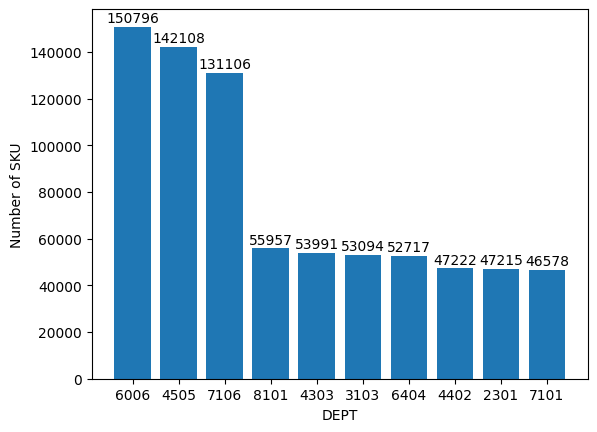

In [16]:
bars = plt.bar(dept_count.head(10)["index"], dept_count.head(10)["DEPT"])
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 1), textcoords='offset points', ha='center', va='bottom')

plt.xlabel("DEPT")
plt.ylabel("Number of SKU")
plt.show();

### Style

In [42]:
dept_sku["STYLE"].nunique()

315122

In [17]:
dept_sku["STYLE"].value_counts()

N     HARDWI    541
      PHOEBE    460
      NIKA      387
70    S55KR9    340
E     ROMAYN    333
               ... 
2823  LP1038      1
78    JLRU13      1
68    JQRU26      1
      23815       1
      844171      1
Name: STYLE, Length: 315122, dtype: int64

The format for STYLE is messy, with many spaces

In [18]:
dept_sku["STYLE"] = dept_sku["STYLE"].str.strip()

In [19]:
style_count = dept_sku["STYLE"].value_counts().reset_index()

In [59]:
style_count["STYLE"].describe()

count    315122.000000
mean          4.937865
std           7.015116
min           1.000000
25%           1.000000
50%           3.000000
75%           6.000000
max         541.000000
Name: STYLE, dtype: float64

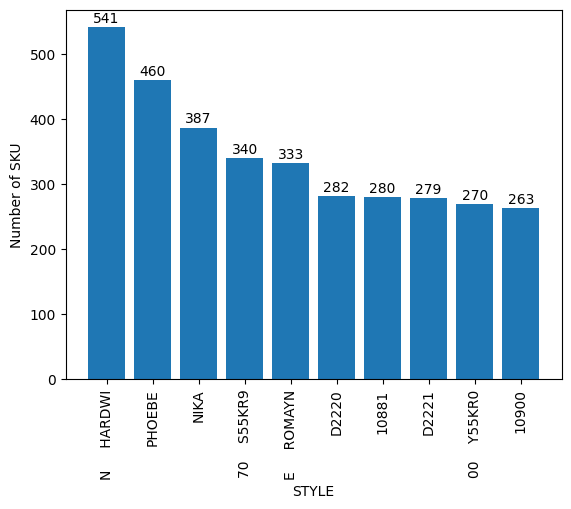

In [20]:
bars = plt.bar(style_count.head(10)["index"], style_count.head(10)["STYLE"])
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 1), textcoords='offset points', ha='center', va='bottom')

plt.xticks(rotation=90)
plt.xlabel("STYLE")
plt.ylabel("Number of SKU")
plt.show();

### Color

In [43]:
dept_sku["COLOR"].nunique()

71322

In [22]:
dept_sku["COLOR"] = dept_sku["COLOR"].str.strip()

In [23]:
dept_sku["COLOR"].value_counts()

BLACK          98933
WHITE          42667
NAVY           30521
RED            22840
MULTI          20538
               ...  
BLK/BL/WH/         1
CLEAR/BLACK        1
PENCIL             1
RED BEAD           1
JAN S04GWP         1
Name: COLOR, Length: 71322, dtype: int64

In [24]:
color_count = dept_sku["COLOR"].value_counts().reset_index()
color_count

,index,COLOR
0,BLACK,98933
1,WHITE,42667
2,NAVY,30521
3,RED,22840
4,MULTI,20538
...,...,...
54116,41SINFYRCH,1
54115,02DIVIN 62NF,1
54114,43DEEPRUSS,1
54113,TAC/DRY 64C4,1


In [60]:
color_count["COLOR"].describe()

count    71322.000000
mean        21.816971
std        476.629565
min          1.000000
25%          1.000000
50%          4.000000
75%         10.000000
max      98933.000000
Name: COLOR, dtype: float64

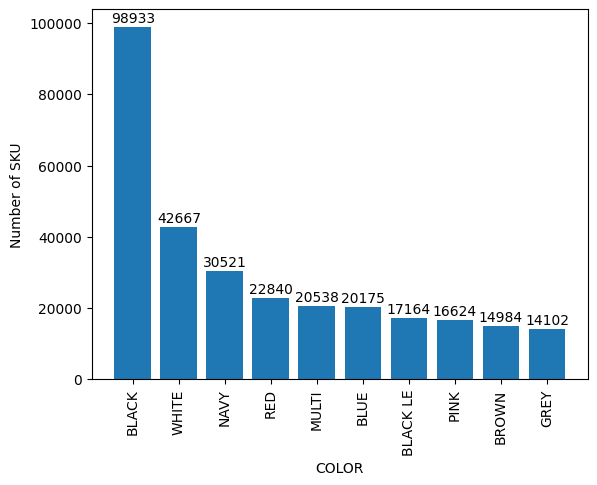

In [25]:
bars = plt.bar(color_count.head(10)["index"], color_count.head(10)["COLOR"])
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 1), textcoords='offset points', ha='center', va='bottom')

plt.xticks(rotation=90)
plt.xlabel("COLOR")
plt.ylabel("Number of SKU")
plt.show();

### Size

In [26]:
dept_sku["SIZE"] = dept_sku["SIZE"].str.strip()

In [27]:
dept_sku["SIZE"].value_counts()

L             124554
M             124347
S             107074
ALL           102739
XL             89543
               ...  
30 PULLMAN         1
BRIEFCASE          1
27 PULLMAN         1
11.5X16X5.         1
CURVE              1
Name: SIZE, Length: 9784, dtype: int64

In [28]:
size_count = dept_sku["SIZE"].value_counts().reset_index()
size_count

,index,SIZE
0,L,124554
1,M,124347
2,S,107074
3,ALL,102739
4,XL,89543
...,...,...
6378,100ML,1
6377,.17 OZ.,1
6376,1.7 S98,1
6375,SHWR GEL,1


In [61]:
size_count["SIZE"].describe()

count      9784.000000
mean        159.038226
std        2704.240172
min           1.000000
25%           1.000000
50%           1.000000
75%           6.000000
max      124554.000000
Name: SIZE, dtype: float64

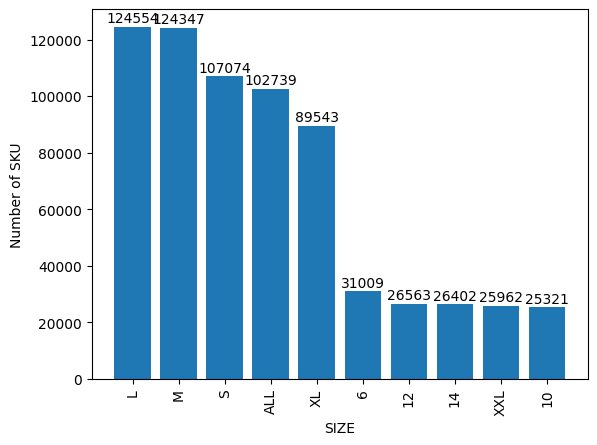

In [29]:
bars = plt.bar(size_count.head(10)["index"], size_count.head(10)["SIZE"])
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 1), textcoords='offset points', ha='center', va='bottom')

plt.xticks(rotation=90)
plt.xlabel("SIZE")
plt.ylabel("Number of SKU")
plt.show();

### Packsize

In [30]:
dept_sku["PACKSIZE"] = dept_sku["PACKSIZE"].astype(int)

In [44]:
dept_sku["PACKSIZE"].nunique()

48

In [31]:
dept_sku["PACKSIZE"].value_counts()

1      1525437
3        13987
6         7252
2         4152
4         2925
12         602
403        300
10         230
501        150
8          139
36         104
201         97
50          79
101         79
24          72
100         46
25          44
48          40
7           40
601         36
0           34
5           32
20          19
500         18
301         14
401         10
120          9
40           8
18           8
600          7
58           6
75           6
801          6
300          5
508          5
11           5
720          4
16           4
29           4
23           4
9            3
200          2
80           1
70           1
190          1
999          1
250          1
96           1
Name: PACKSIZE, dtype: int64

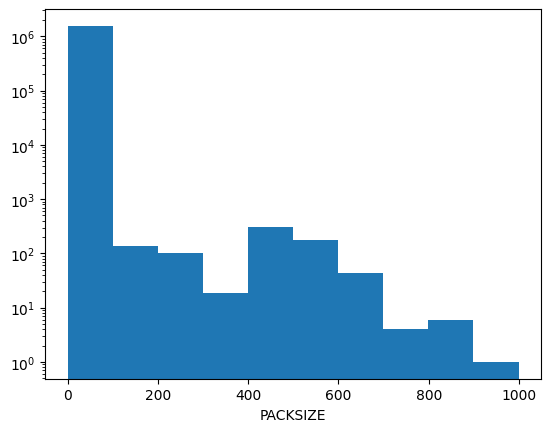

In [32]:
plt.hist(dept_sku["PACKSIZE"], log=True)
plt.xlabel("PACKSIZE");

### Vendor

In [33]:
dept_sku["VENDOR"] = dept_sku["VENDOR"].astype(str)

In [45]:
dept_sku["VENDOR"].value_counts()

5715232    147944
5010255     49621
614761      30722
3313116     29566
60904       21835
            ...  
4215191         1
0113327         1
1010078         1
14122           1
3413313         1
Name: VENDOR, Length: 2597, dtype: int64

In [34]:
vendor_count = dept_sku["VENDOR"].value_counts().reset_index()
vendor_count

In [62]:
vendor_count["VENDOR"].describe()

count      2597.000000
mean        599.164420
std        3504.753589
min           1.000000
25%           8.000000
50%          43.000000
75%         280.000000
max      147944.000000
Name: VENDOR, dtype: float64

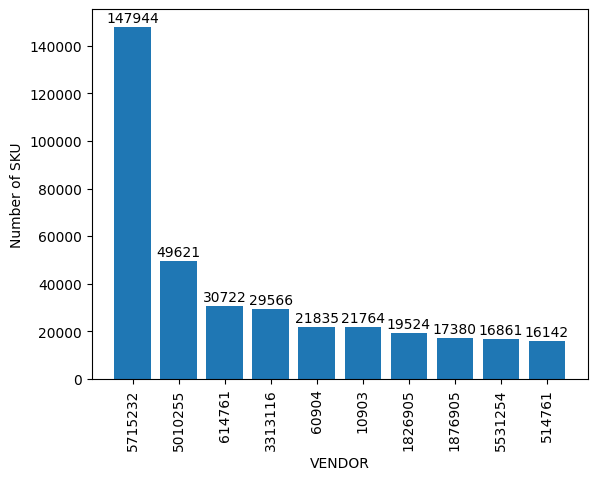

In [35]:
bars = plt.bar(vendor_count.head(10)["index"], vendor_count.head(10)["VENDOR"])
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 1), textcoords='offset points', ha='center', va='bottom')

plt.xticks(rotation=90)
plt.xlabel("VENDOR")
plt.ylabel("Number of SKU")
plt.show();

### Brand

In [46]:
dept_sku["BRAND"].nunique()

1925

In [36]:
dept_sku["BRAND"].value_counts()

POLO FAS     130994
BROWN SH      52160
ENZO ANG      49121
LIZ CLAI      43723
ROUNDTRE      39466
              ...  
BORDERLA          1
MARIAN &          1
WIN-SIR           1
OAK SHOP          1
CRUSH             1
Name: BRAND, Length: 1925, dtype: int64

In [37]:
brand_count = dept_sku["BRAND"].value_counts().reset_index()
brand_count

In [63]:
brand_count["BRAND"].describe()

count      1925.000000
mean        808.327273
std        4267.983010
min           1.000000
25%           8.000000
50%          49.000000
75%         300.000000
max      130994.000000
Name: BRAND, dtype: float64

There exist empty brand name

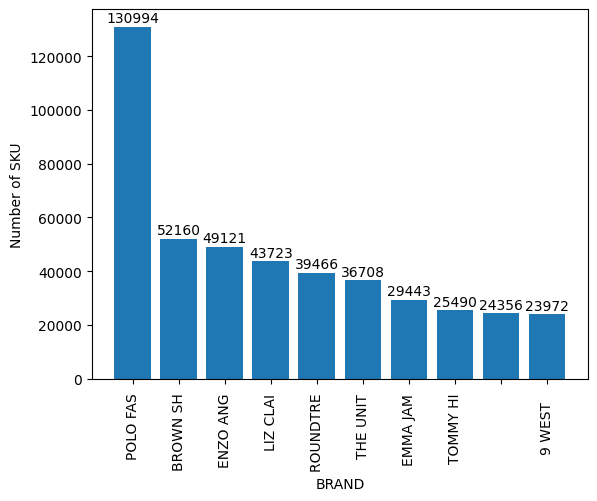

In [39]:
bars = plt.bar(brand_count.head(10)["index"], brand_count.head(10)["BRAND"])
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 1), textcoords='offset points', ha='center', va='bottom')

plt.xticks(rotation=90)
plt.xlabel("BRAND")
plt.ylabel("Number of SKU")
plt.show();

In [57]:
dept_sku.groupby(["DEPT"])["BRAND"].count()

DEPT
800       2145
801      21620
1100      1121
1107      9615
1202     17109
1301     38246
1704     14664
1905     16558
2102     14873
2105     10070
2107      5039
2200      3731
2301     47215
2503     31262
3100      1019
3102     29004
3103     53094
3105     32417
3107      1786
3404     27608
3701     24280
4303     53991
4400       269
4402     47222
4407     33985
4505    142108
4704      8975
4801     16067
5100      1445
5102     16233
5203     37678
5207      1474
5301     35158
5305     16861
5404     28729
5506      1451
6006    150796
6107      3929
6400       286
6402      8253
6404     52717
6505     21445
6601     26526
7101     46578
7102     18647
7104     11543
7106    131106
7200       330
7205     24188
7307      5532
8000       324
8002       272
8101     55957
8104      4825
8305     39931
8306     26771
9000      2107
9105     39479
9306     10779
9801     29587
Name: BRAND, dtype: int64